<a href="https://colab.research.google.com/github/shiningcloud99/SimplePythonPOS/blob/main/Copy_of_FIX_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Annisa Esadora Hartanto
- **Email:** annisaessadorahartanto@gmail.com
- **ID Dicoding:** annisaesadora

## Menentukan Pertanyaan Bisnis

- What is the trend of bike rentals in the past 2 years?
- Who often rents a bike : casual or registered customers?
- How do weather conditions affect bike rentals?
- At what time are most popular bike rented on weekdays and holidays?
- In what season are most bikes rented?


## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Import dataset from day.csv
- Import dataset from hour.csv

### Assessing Data

**Assessing Data** `day_df`

**Data Type Check**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- There is 1 mistake in terms of data type. In the dtday column, object should be datetime

**Missing Value Check**

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- After running the missing value check, the result is there is no missing value in the data day_df

**Data Duplicate Check**

In [8]:
print('Number of duplicate data: ', day_df.duplicated().sum())

Number of duplicate data:  0


- There is no data that has been duplicated

**Statistic Value Check**

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Data seems normal.

**Assessing Table** `hour_df`

**Data Type Check**

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Missing Value Check**

In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- No missing value in this data.

**Data Duplicate Check**

In [12]:
print('Number of duplicate data: ', hour_df.duplicated().sum())

Number of duplicate data:  0


- There is no duplicated data.

**Statistic Value Check**

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- This data is normal.

### Cleaning Data

**Cleaning Table** `day_df`

**Removing unnecessary columns**

In [15]:
day_col_drop = ['instant', 'windspeed']
day_df.drop(day_col_drop, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,82,1518,1600


- Dropping instant, workingday, and windspeed column because there is no need in this data analysis.

**Renaming Column**

In [16]:
day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'cnt'  : 'total'
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,weather,temperature,atemp,hum,casual,registered,total
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,82,1518,1600


- This is for making it easy to read, analyze and visualizing the data

**Mapping some of the Columns that has number to Text**

In [17]:
season_mapping = {
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}
day_df['season'] = day_df['season'].map(season_mapping)

year_mapping = {
    0 : 2011,
    1 : 2012
}
day_df['year'] = day_df['year'].map(year_mapping)

month_mapping = {
    1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
    7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)

weather_mapping = {
    1 : 'Clear',
    2 : 'Cloudy/Mist',
    3 : 'Light Rain/Snow',
    4 : 'Heavy Rain/Snow'
}
day_df['weather'] = day_df['weather'].map(weather_mapping)

day_df.head()

,date,season,year,month,holiday,weekday,weather,temperature,atemp,hum,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,6,Cloudy/Mist,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,0,Cloudy/Mist,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,2,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,3,Clear,0.226957,0.229270,0.436957,82,1518,1600


**Fixing Data Type**

In [ ]:
day_df['date'] = pd.to_datetime(day_df['date'])

day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   season       0 non-null      category      
 2   year         0 non-null      category      
 3   month        0 non-null      category      
 4   holiday      731 non-null    category      
 5   weekday      731 non-null    category      
 6   weather      0 non-null      category      
 7   temperature  731 non-null    float64       
 8   atemp        731 non-null    float64       
 9   hum          731 non-null    float64       
 10  casual       731 non-null    int64         
 11  registered   731 non-null    int64         
 12  total        731 non-null    int64         
 13  year_month   731 non-null    object        
 14  total_sum    731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4), 

**Insight:**
- Already fixed data types.

**Cleaning Table** `hour_df`

**Cleaning Unnecessary Columns**

In [22]:
hour_col_drop = ['instant','workingday','windspeed']
hour_df.drop(hour_col_drop, axis=1, inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,weather,temperature,atemp,hum,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0,1,1


- Dropping instant, workingday, and windspeed column because there is no need in this data analysis.

**Renaming Columns**

In [23]:
hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'cnt'  : 'total'
}, inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,weather,temperature,atemp,hum,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0,1,1


- Renaming for make it easier to read and analyze.

**Mapping**

In [24]:
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)
hour_df['weather'] = hour_df['weather'].map(weather_mapping)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,weather,temperature,atemp,hum,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,0,6,Clear,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,6,Clear,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,6,Clear,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,6,Clear,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,6,Clear,0.24,0.2879,0.75,0,1,1


**Fixing Data Types**

In [25]:
hour_df['date'] = pd.to_datetime(hour_df['date'])

hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17379 non-null  datetime64[ns]
 1   season       17379 non-null  category      
 2   year         17379 non-null  category      
 3   month        17379 non-null  category      
 4   hour         17379 non-null  int64         
 5   holiday      17379 non-null  category      
 6   weekday      17379 non-null  category      
 7   weather      17379 non-null  category      
 8   temperature  17379 non-null  float64       
 9   atemp        17379 non-null  float64       
 10  hum          17379 non-null  float64       
 11  casual       17379 non-null  int64         
 12  registered   17379 non-null  int64         
 13  total        17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.2 MB


## Exploratory Data Analysis (EDA)

### Table Explore

**Exploring monthly total rent in past 2 years**

In [26]:
day_df.groupby(by=['year', 'month']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                         
               sum   max   min         mean
year month                                 
2011 Apr     94870  5312   795  3162.333333
     Aug    136691  5895  1115  4409.387097
     Dec     87323  3940   705  2816.870968
     Feb     48215  2927  1005  1721.964286
     Jan     38189  1985   431  1231.903226
     Jul    141341  6043  3285  4559.387097
     Jun    143512  5515  3767  4783.733333
     Mar     64045  3239   605  2065.967742
     May    135821  5805  2633  4381.322581
     Nov    102167  4486  1495  3405.566667
     Oct    123511  5511   627  3984.225806
     Sep    127418  5423  1842  4247.266667
2012 Apr    174224  7460  1027  5807.466667
     Aug    214503  7865  4549  6919.451613
     Dec    123713  6606   441  3990.741935
     Feb    103137  5062  1529  3556.448276
     Jan     96744  4521  1301  3120.774194
     Jul    203607  8173  4459  6567.967742
     Jun    202830  8120  4127  6761.000000
     Mar    164875  8362  3194  5318.548387
     May    195865  8294  2843  6318.225806
     Nov    152664  6852  2277  5088.800000
     Oct    198841  8156    22  6414.225806
     Sep    218573  8714  4073  7285.766667

**Insight:**
- In 2011 highest rent number is on June
- In 2012 highest rent number is on September

In [27]:
day_df_monthly_total = day_df.groupby(by='month').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
day_df_monthly_total.columns = day_df_monthly_total.columns.droplevel(0)
day_df_monthly_total.sort_values(by='sum', ascending=False)

,sum,max,min,mean
month,,,,
Aug,351194,7865,1115,5664.419355
Jun,346342,8120,3767,5772.366667
Sep,345991,8714,1842,5766.516667
Jul,344948,8173,3285,5563.677419
May,331686,8294,2633,5349.774194
Oct,322352,8156,22,5199.225806
Apr,269094,7460,795,4484.900000
Nov,254831,6852,1495,4247.183333
Mar,228920,8362,605,3692.258065


**Explore Average Rents by Customer Segments**

In [28]:
day_df.groupby(by=['casual', 'registered']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                    
                    sum   max   min    mean
casual registered                          
2      20            22    22    22    22.0
9      432          441   441   441   441.0
       674          683   683   683   683.0
15     416          431   431   431   431.0
25     1137        1162  1162  1162  1162.0
...                 ...   ...   ...     ...
3155   4681        7836  7836  7836  7836.0
3160   5554        8714  8714  8714  8714.0
3252   3605        6857  6857  6857  6857.0
3283   3308        6591  6591  6591  6591.0
3410   4884        8294  8294  8294  8294.0

[731 rows x 4 columns]

In [29]:
agg_result = day_df[['casual', 'registered']].sum()

print(agg_result)

casual         620017
registered    2672662
dtype: int64


**Explore Monthly Rents by Seasons**

In [30]:
day_df.groupby(by='season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temperature' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum' : ['mean', 'max', 'min', 'std'],
})

total                          temperature                      \
            sum   max   min         mean        mean       max       min   
season                                                                     
Fall    1061129  8714  1115  5644.303191    0.706309  0.861667  0.469167   
Spring   471348  7836   431  2604.132597    0.297748  0.572500  0.059130   
Summer   918589  8362   795  4992.331522    0.544405  0.808333  0.253043   
Winter   841613  8555    22  4728.162921    0.422906  0.657500  0.220833   

                     atemp                                     hum            \
             std      mean       max       min       std      mean       max   
season                                                                         
Fall    0.070848  0.655898  0.840896  0.242400  0.072056  0.633482  0.939565   
Spring  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903  0.948261   
Summer  0.122650  0.520307  0.757579  0.250339  0.108022  0.626948  0.922500   
Winter  0.107834  0.415539  0.607975  0.227913  0.095536  0.668719  0.972500   

                            
             min       std  
season                      
Fall    0.360000  0.119349  
Spring  0.000000  0.151880  
Summer  0.254167  0.152841  
Winter  0.333478  0.131248

In [31]:
day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

,season,registered,casual
0,Fall,835038,226091
1,Spring,410726,60622
2,Summer,715067,203522
3,Winter,711831,129782


**Explore Total Rents by Weather**

In [32]:
day_df.groupby(by='weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                        
                     sum   max  min         mean
weather                                         
Clear            2257952  8714  431  4876.786177
Cloudy/Mist       996858  8362  605  4035.862348
Light Rain/Snow    37869  4639   22  1803.285714

In [33]:
day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()

,weather,registered,casual
0,Clear,1811606,446346
1,Cloudy/Mist,827082,169776
2,Light Rain/Snow,33974,3895


### Table Explore `hour_df`

**Explore Total Rent in Working Day**

In [34]:
filter_weekday = hour_df[(hour_df["weekday"] == 1)]
hour_df_weekday = filter_weekday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_weekday.columns = hour_df_weekday.columns.droplevel(0)
hour_df_weekday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
17,52249,922,26,502.394231
18,50060,968,26,481.346154
8,42868,784,18,412.192308
19,35836,665,18,344.576923
16,29583,524,33,284.451923
7,25848,530,13,248.538462
20,25176,475,23,242.076923
9,22718,397,47,218.442308
12,21581,543,36,207.509615


**Exploring Hourly Total Rents on Holiday**

In [35]:
filter_holiday = hour_df[(hour_df["holiday"] == 1)|(hour_df["weekday"] == 0)]
hour_df_holiday = filter_holiday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_holiday.columns = hour_df_holiday.columns.droplevel(0)
hour_df_holiday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
13,45637,729,52,362.198413
12,45191,776,61,358.658730
14,44193,678,39,350.738095
16,43035,701,11,341.547619
15,42731,724,7,339.134921
17,39627,723,25,314.500000
11,38334,591,49,304.238095
18,34270,676,23,271.984127
10,31424,495,31,249.396825


## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of bike rentals in the past 2 years?

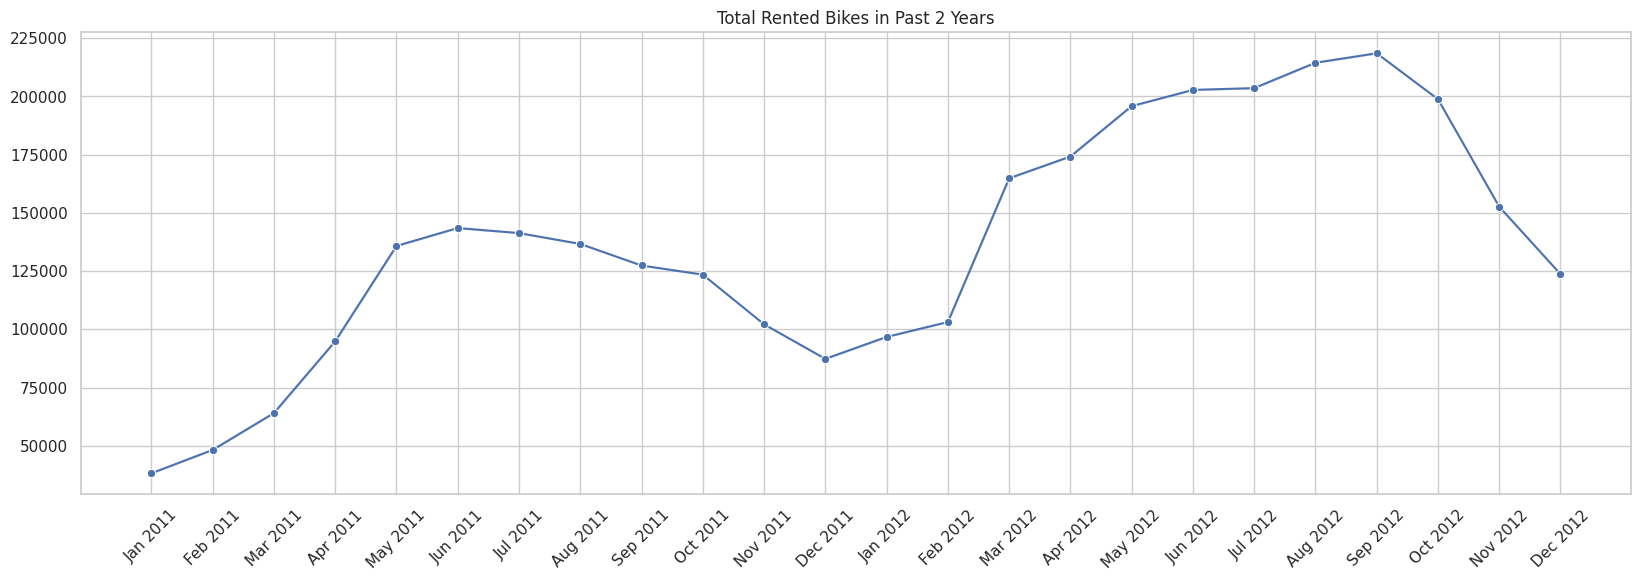

In [38]:
#datatype column merging
plot_month = day_df['month'].astype(str)
plot_year = day_df['year'].astype(str)

#month + year column merging
day_df['year_month'] = plot_month + ' ' + plot_year


day_df['total_sum'] = day_df.groupby('year_month')['total'].transform('sum')

#line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df,
    x='year_month',
    y='total_sum',
    marker='o'
)
plt.title("Total Rented Bikes in Past 2 Years")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

In [39]:
day_df.groupby(by='year_month')['total_sum'].sum()

,total_sum
year_month,
Apr 2011,2846100
Apr 2012,5226720
Aug 2011,4237421
Aug 2012,6649593
Dec 2011,2707013
Dec 2012,3835103
Feb 2011,1350020
Feb 2012,2990973
Jan 2011,1183859


**Insight**
- From the results of the data analysis above, it can be said that the bicycle rental trend from 2011 to 2012 has increased quite significantly. In 2011, a significant increase was seen in May - June, then decreased in October - December. In 2012, a significant increase began in March - September, which then began to decline again in October - December.

### Pertanyaan 2: Who often rents a bike : casual or registered customers?

<ipython-input-36-a606d2677f29>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


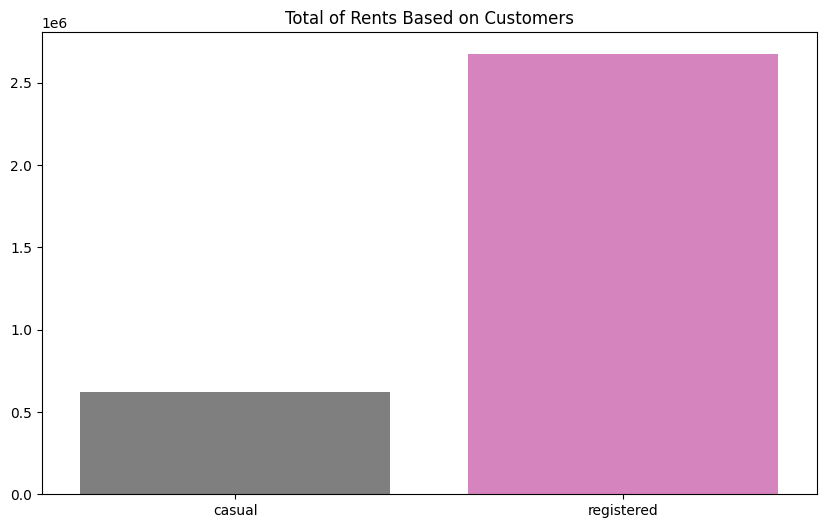

In [36]:
plot_total = pd.DataFrame({
    'user_type': ['casual', 'registered'],
    'total': [day_df['casual'].sum(), day_df['registered'].sum()]
})

colors = ['tab:grey' if total < plot_total['total'].max() else 'tab:pink' for total in plot_total['total']]
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_total,
    x='user_type',
    y='total',
    palette=colors
)

plt.title("Total of Rents Based on Customers")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight**
- From the results of the data analysis above, it can be seen that the total number of bicycle renters is more than registered users. There is a very big difference if you review it between the number of casual and registered users. It can be concluded that of the total existing bicycle renters, the majority of them are registered renters.

### Pertanyaan 3: How do weather conditions affect bike rentals?

<ipython-input-46-fbe3b8b8f047>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

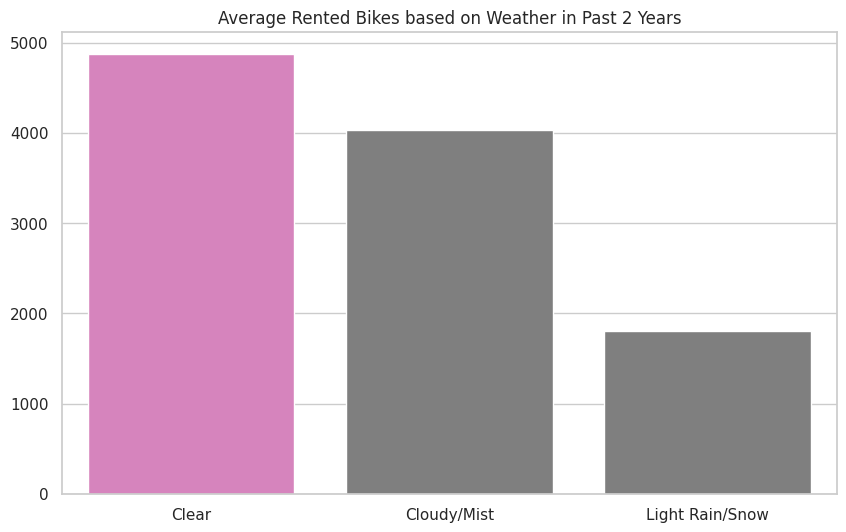

In [46]:
#total variable
plot_weather = day_df.groupby(by='weather').agg({
    'total': 'mean'
}).reset_index()

colors = ['tab:grey' if total < plot_weather['total'].max() else 'tab:pink' for total in plot_weather['total']]

# chart bar
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_weather,
    x='weather',
    y='total',
    palette=colors
)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Average Rented Bikes based on Weather in Past 2 Years')
plt.show()

**Insight**
- From the results of data analysis and visualization of the average number of bikes rentals based on weather, it can be seen that most people rent bikes in clear weather, followed by cloudy/misty weather, then light rain/snow weather. In heavy rain/snow weather there are no renters. It can be concluded that the weather has a significant influence on the number of bikes rented.

### Pertanyaan 4: At what time are most popular bicycles rented on weekdays and holidays?


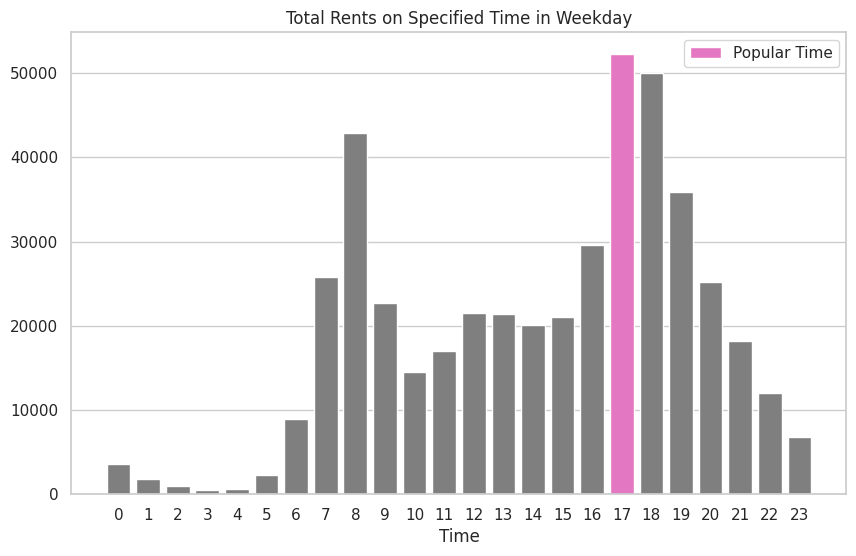

In [41]:
#total variable
plot_hour_weekday = filter_weekday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

#indexing max total
max_col = plot_hour_weekday['total'].idxmax()

#bar plotting
sns.barplot(
    data=plot_hour_weekday,
    x='hour',
    y='total',
    color='tab:grey'
)
plt.bar(max_col, plot_hour_weekday.loc[max_col, 'total'], color='tab:pink', label='Popular Time')

plt.title("Total Rents on Specified Time in Weekday")
plt.xlabel('Time')
plt.ylabel(None)
plt.legend()
plt.show()

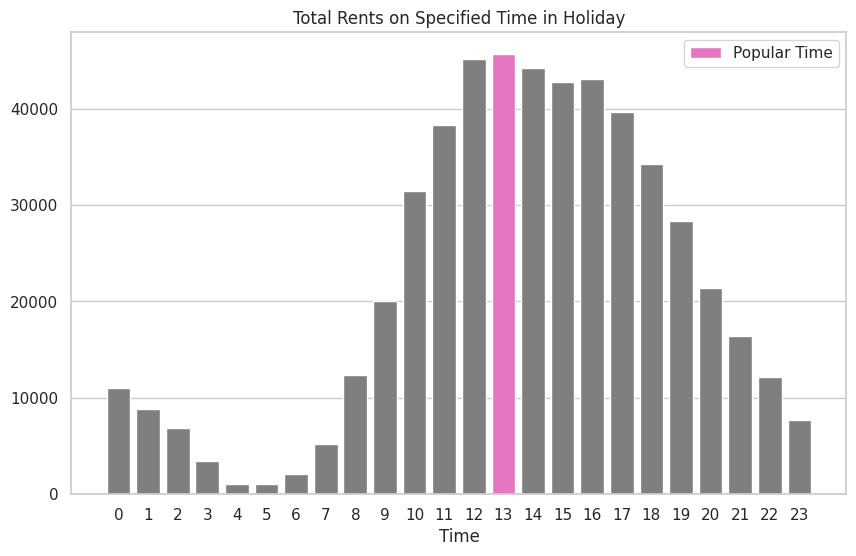

In [42]:
#total variable
plot_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# indexing max total
max_col = plot_hour_holiday['total'].idxmax()

# bar plotting
sns.barplot(
    data=plot_hour_holiday,
    x='hour',
    y='total',
    color='tab:grey'
)
plt.bar(max_col, plot_hour_holiday.loc[max_col, 'total'], color='tab:pink', label='Popular Time')

plt.title("Total Rents on Specified Time in Holiday")
plt.xlabel('Time')
plt.ylabel(None)
plt.legend()
plt.show()

**Insight:**
- From the analysis of data regarding rentals on weekdays and holidays, it can be seen that during holidays there are more popular times for bike rentals than on weekdays. On weekdays, rentals are busiest at 17.00-18.00. Meanwhile, during holidays, rentals are busiest at 12.00-16.00.

### Pertanyaan 5: In what season are most bicycles rented?

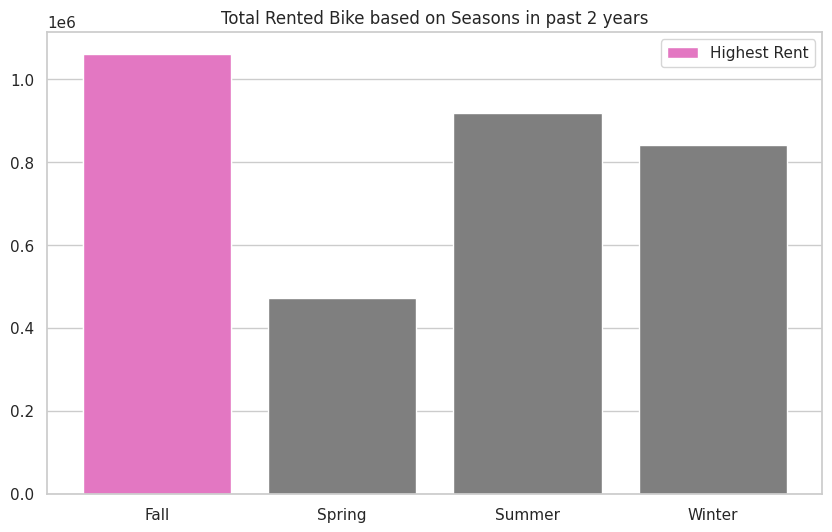

In [43]:
#total variable
plot_season = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plot_season['total'] = plot_season['registered'] + plot_season['casual']

max_index = plot_season['total'].idxmax()

# bar plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_season,
    x='season',
    y='total',
    color='tab:grey'
)
plt.bar(plot_season.loc[max_index, 'season'], plot_season.loc[max_index, 'total'], color='tab:pink', label='Highest Rent')

plt.title('Total Rented Bike based on Seasons in past 2 years')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

**Insight**
- From the results of data analysis, it can be seen that the highest number of users is in autumn, followed by summer. Numbers begin to decline in winter and spring.

## Analisis Lanjutan (Opsional)

**RFM Analysis**

## Conclusion

- Pertanyaan 1: From the results of the data analysis above, it can be said that the bicycle rental trend from 2011 to 2012 has increased quite significantly. In 2011, a significant increase was seen in May - June, then decreased in October - December. In 2012, a significant increase began in March - September, which then began to decline again in October - December.
- Pertanyaan 2: From the results of the data analysis above, it can be seen that the total number of bicycle renters is more than registered users. There is a very big difference if you review it between the number of casual and registered users. It can be concluded that of the total existing bicycle renters, the majority of them are registered renters.
- Pertanyaan 3: From the results of data analysis and visualization of the average number of bikes rentals based on weather, it can be seen that most people rent bikes in clear weather, followed by cloudy/misty weather, then light rain/snow weather. In heavy rain/snow weather there are no renters. It can be concluded that the weather has a significant influence on the number of bikes rented.
- Pertanyaan 4: From the analysis of data regarding rentals on weekdays and holidays, it can be seen that during holidays there are more popular times for bike rentals than on weekdays. On weekdays, rentals are busiest at 17.00-18.00. Meanwhile, during holidays, rentals are busiest at 12.00-16.00.
- Pertanyaan 5: From the results of data analysis, it can be seen that the highest number of users is in autumn, followed by summer. Numbers begin to decline in winter and spring.